In [1]:
#SNA Project Part2

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation, hamming

In [5]:
u_cols=["user_id","age","sex","occupation","zip_code"]
r_cols=["user_id","movie_id","rating","timestamp"]
m_cols=["movie_id","title","release_date","video_release_date","imdb_url","unknown","Action","Adventure",
       "Animation","Children\'s","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical",
       "Mystery","Romance","Sci-Fi","Thriller","War","Western"]
# 1.Users Dataset
users=pd.read_csv("u.user",sep='|',names=u_cols,parse_dates=True)
#2. Rating dataset
ratings=pd.read_csv("u.data",sep='\t',names=r_cols)
#3. Movies Dataset
movies=pd.read_csv("u.item",sep='|',names=m_cols,encoding="latin-1")
# ratings=ratings.drop('timestamp',1)
# movies=movies.drop(['imdb_url','release_date','video_release_date'],1)

In [7]:
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


In [9]:
G=nx.Graph()
for i in range(len(ratings_matrix.columns)):
    for j in range(len(ratings_matrix.index)):
        if(ratings_matrix.loc[i,j]>=0.30):
            G.add_edge(i,j,weight=ratings_matrix.loc[i,j])


/home/dell/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


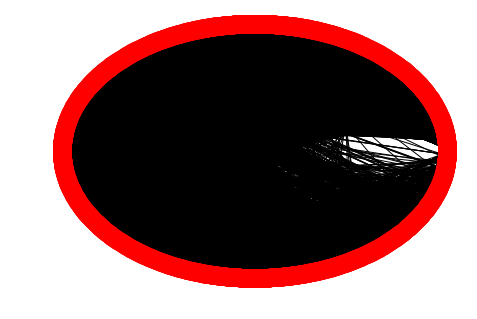

In [10]:
nx.draw_circular(G)
plt.show()

In [ ]:
nx.density(G)

0.04786309553565154

In [ ]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
j=sorted(map(sorted, next_level_communities))

In [ ]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [ ]:
result=[]
for l in j:
    p=[]
    for i in l:
        p.append(movies.at[i,'title'])
    result.append(p)
print(result)        

In [ ]:
print(j)

In [ ]:
len(G.edges())